## 1.1 - Clustering Data with *k*-Means

In [1]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
                                          "Petal Length", "Petal Width",
                                          "Name"])

In [2]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from sklearn.cluster import AgglomerativeClustering, KMeans

In [3]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# df['Name as Number'] = df['Name'].apply(lambda x: 1 if x == "Iris-setosa" else 0 if x == "Iris-versicolor" else 2)

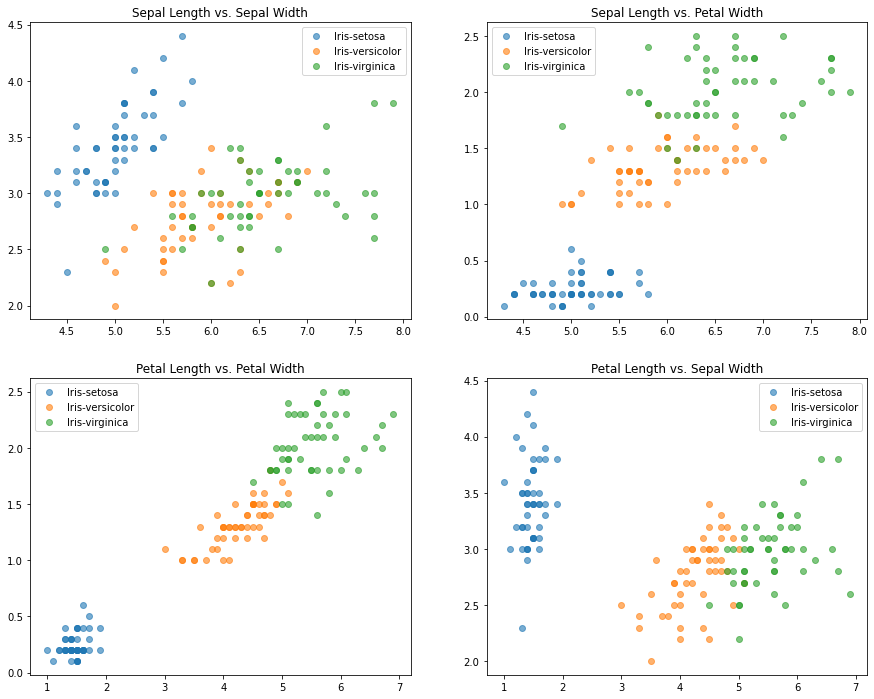

In [5]:
fig = plt.figure(figsize=(15,12))
groups = df.groupby('Name')

ax = fig.add_subplot(221)
for name, group in groups:
    plt.plot(group['Sepal Length'], group['Sepal Width'], 
             marker="o", linestyle="", label=name, alpha=0.6)
plt.title('Sepal Length vs. Sepal Width')    
plt.legend();

ax = fig.add_subplot(222)
for name, group in groups:
    plt.plot(group['Sepal Length'], group['Petal Width'], 
             marker="o", linestyle="", label=name, alpha=0.6)
plt.title('Sepal Length vs. Petal Width')
plt.legend();

ax = fig.add_subplot(223)
for name, group in groups:
    plt.plot(group['Petal Length'], group['Petal Width'], 
             marker="o", linestyle="", label=name, alpha=0.6)
plt.title('Petal Length vs. Petal Width')    
plt.legend();

ax = fig.add_subplot(224)
for name, group in groups:
    plt.plot(group['Petal Length'], group['Sepal Width'], 
             marker="o", linestyle="", label=name, alpha=0.6)
plt.title('Petal Length vs. Sepal Width')
plt.legend();

**Iris-setosa appears to be more different from the other two species**. Iris-versicolor and Iris-verginica has slight overlapping in the dataset, for example, in sepal length vs. sepal width.

In [6]:
n_blobs = 3

drop_labels = ['Name']
# drop_labels = ['Name', 'Name as Number']

X_blobs = df.drop(drop_labels, axis=1)
y_blobs = df['Name']

In [7]:
# Cluster data using k-means
kmeans = KMeans(n_clusters=n_blobs)
kmeans.fit(X_blobs)

y_pred = kmeans.predict(X_blobs)

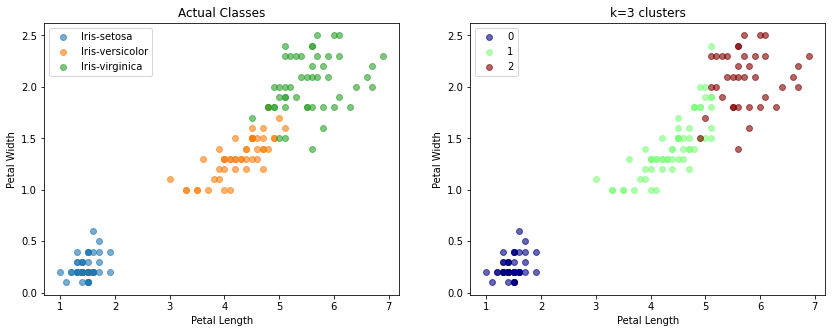

In [8]:
def plot_cluster_pred_vs_true(X, y, y_clusters, n_true):
    """Compare clustering vs. actual."""
    fig = plt.figure(figsize=(14, 5))

    cmap = cm.get_cmap('jet')
    colors = cmap(np.linspace(0, 1, n_true))

    ax = fig.add_subplot(121)
    for name, group in groups:
        plt.plot(group['Petal Length'], group['Petal Width'], 
                 marker="o", linestyle="", alpha=0.6,
                 label=name)
    plt.title('Actual Classes')    
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend();

    ax = fig.add_subplot(122)
    for g in np.unique(y_clusters):
        ix = y_clusters == g
        ax.scatter(df['Petal Length'].iloc[ix], 
                   df['Petal Width'].iloc[ix], 
                   c = [colors[g]], label = g, s = 35, alpha=0.6)
    plt.title('k={:d} clusters'.format(n_true))
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

    plt.show()

plot_cluster_pred_vs_true(df, y_blobs, y_pred, n_blobs)

The *k*-means clustering appears to do pretty well on the data for Iris-Setosa, but it has a couple examples mixed up for Iris-versicolor and Iris-verginica. 

In [9]:
pd.crosstab(y_blobs, y_pred)

col_0,0,1,2
Name,,,
Iris-setosa,50,0,0
Iris-versicolor,0,48,2
Iris-virginica,0,14,36


In [10]:
pd.crosstab(df['Name'], [y_blobs, y_pred], rownames=['Species'], colnames=['Actual','Predicted'])

Actual          Iris-setosa Iris-versicolor    Iris-virginica    
Predicted                 0               1  2              1   2
Species                                                          
Iris-setosa              50               0  0              0   0
Iris-versicolor           0              48  2              0   0
Iris-virginica            0               0  0             14  36

**16 of the 150 instances are put into the incorrect clusters**, and **Cluster 0 corresponds perfectly to the species *Iris-Setosa***, which agrees with what we can observe from the scatter plot.

*Note: The predicted cluster numbers are by random and can vary at each run. Refer the numbers in the predicted column to the numbers in the legend on the scatter plot.*

---
## 1.2 - Hierarchical Clustering of Features

In [11]:
from sklearn.feature_selection import mutual_info_regression
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0])+1
    n_obs = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)

In [12]:
# Compute MI with 'Sepal Length' as target feature
X = X_blobs
y = X_blobs['Sepal Length']

mi_sl = mutual_info_regression(X, y)

In [13]:
# Compute MI with 'Sepal Width' as target feature
X = X_blobs
y = X_blobs['Sepal Width']

mi_sw = mutual_info_regression(X, y)

In [14]:
# Compute MI with 'Petal Length' as target feature
X = X_blobs
y = X_blobs['Petal Length']

mi_pl = mutual_info_regression(X, y)

In [15]:
# Compute MI with 'Petal Width' as target feature
X = X_blobs
y = X_blobs['Petal Width']

mi_pw = mutual_info_regression(X, y)

In [16]:
# Create dataframe from the arrays of MI
data = np.array([mi_sl, mi_sw, mi_pl, mi_pw])
df_2 = pd.DataFrame(data=data, 
                  index=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], 
                  columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])
df_2

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,3.180876,0.286961,0.890413,0.615336
Sepal Width,0.275462,2.648959,0.334315,0.428977
Petal Length,0.860035,0.367872,3.164995,1.216817
Petal Width,0.635355,0.429940,1.228863,2.700018


In [17]:
n_features = df['Name'].nunique()
model = AgglomerativeClustering(n_clusters=n_features)
model = model.fit(df_2)

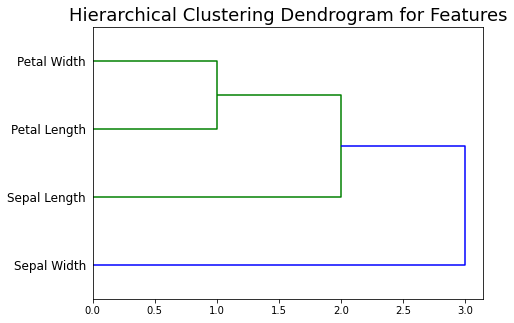

In [18]:
figure = plt.figure(figsize=(7, 5))
labels = df_2.columns.values
plt.title('Hierarchical Clustering Dendrogram for Features', fontsize=18)
plot_dendrogram(model, labels=labels, orientation='right', leaf_font_size=12)
plt.show()

From the dendrogram, **petal width and petal length are the most similar pair of features**, and **sepal width is most unlike the others**.